In [2]:
import random as rd
import pandas as pd
import math

Variant = 12
rd.seed(Variant)
Str1 = 'qwertyuioplkjhgfdsazxcvbnmQWERTYUIOPASDFGHJKLZXCVBNM'
N = rd.randint(20,40)
s1 = ''
for i in range(N):
    s1 += Str1[rd.randint(0, len(Str1)-1)]
D = '!@#$%&*+:;|'[rd.randint(0,10)]
N1 = rd.randint(3,30)
N2 = int(N1 * (N1 + 1) / 2)
if (int(N2/N1) - math.floor(N2/N1)) == 0:
    M = int(N2 / N1)
    K = int(N2 / M)
else:
    M = int(N2 / (N1 + 1))
    K = int(N2 / M)
N4 = rd.randint(123432, 5645634534)
Data  = pd.DataFrame({'Задание':[1,2,3,4,5],'Параметры':['S='+s1,[D, 'N='+str(N2),
                    'M ='+str(M), 'K = '+str(K)],'-','N='+str(N4),'-']})
Data

,Задание,Параметры
0,1,S=sJIJvpnqbTsHMRLDgPqJFpEblchrAjtUKcK
1,2,"[*, N=406, M =14, K = 29]"
2,3,-
3,4,N=3618218374
4,5,-


Задание 1


In [ ]:
format ELF64

public _start
public exit
public print_symb

section '.data'
  string db 'sJIJvpnqbTsHMRLDgPqJFpEblchrAjtUKcK'

section '.bss' writable
  place db 1

section '.text' executable
  _start:
    mov rcx, 35

    .iter:
       mov al, [string+rcx]
       push rcx             
       call print_symb      
       pop rcx             
       dec rcx              
       cmp rcx, -1         
       jne .iter

    call exit            

print_symb:
  push rax
  mov eax, 1          
  mov edi, 1          
  pop rdx             
  mov [place], dl     
  mov rsi, place       
  mov edx, 1          
  syscall             
  ret

exit:
  mov eax, 60       
  xor edi, edi       
  syscall    

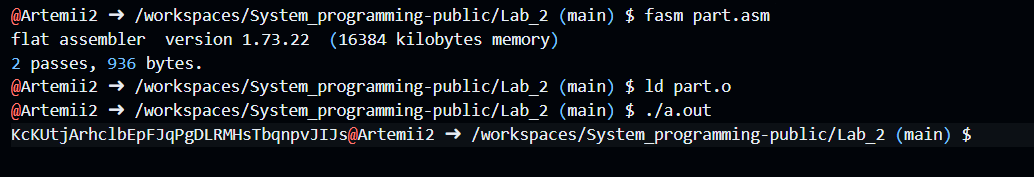

Задание 2

In [ ]:
format ELF64

public _start
public exit
public print_symb

section '.bss' writable
  array db 14 dup ('*')
  newline db 29 dup (0xA)
  place db 1

section '.text' executable
  _start:
    xor rsi, rsi
    .iter1:
      xor rdi, rdi  
      .iter2:
        mov al, [array+rdi]
        push rdi
        call print_symb
        pop rdi
        inc rdi
        cmp rdi,7
        jne .iter2

      mov al, [newline+rsi]
      push rsi
      call print_symb
      pop rsi

      inc rsi
      cmp rsi,15
      jne .iter1
    call exit

print_symb:
  push rax           
  mov [place], al    
  mov eax, 4         
  mov ebx, 1         
  mov ecx, place     
  mov edx, 1        
  int 0x80           
  pop rax            
  ret

exit:
  mov eax, 1         
  mov ebx, 0         
  int 0x80

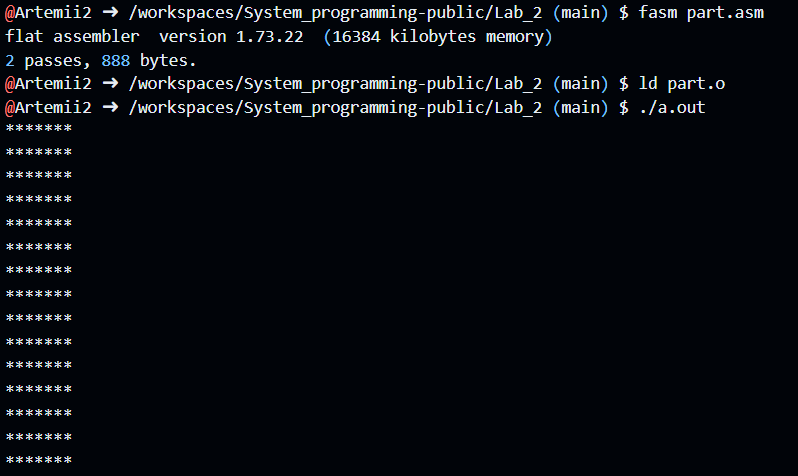

Задание 3

In [ ]:


format ELF64

public _start
public exit
public print_symb

section '.bss' writable
  array db 29 dup ('*')          
  newline db 29 dup (0xA)  
  place db 1
  count dq 0                

section '.text' executable
  _start:
    xor rsi, rsi    

    .iter1:              
      xor rdi, rdi  

      mov rbx, [count]
      inc rbx
      mov [count], rbx  

      .iter2:
        mov al, [array + rdi]   
        call print_symb        
        inc rdi                
        cmp rdi, [count]           
        jne .iter2             

      ; вывод новой строки
      mov al, [newline + rsi]    
      call print_symb            

      inc rsi                  
      cmp rsi, 15                
      jne .iter1             
    call exit                  

print_symb:
  push rax
  mov [place], al
  mov eax, 4
  mov ebx, 1
  mov ecx, place
  mov edx, 1
  int 0x80
  pop rax
  ret

exit:
  mov eax, 1
  mov ebx, 0
  int 0x80


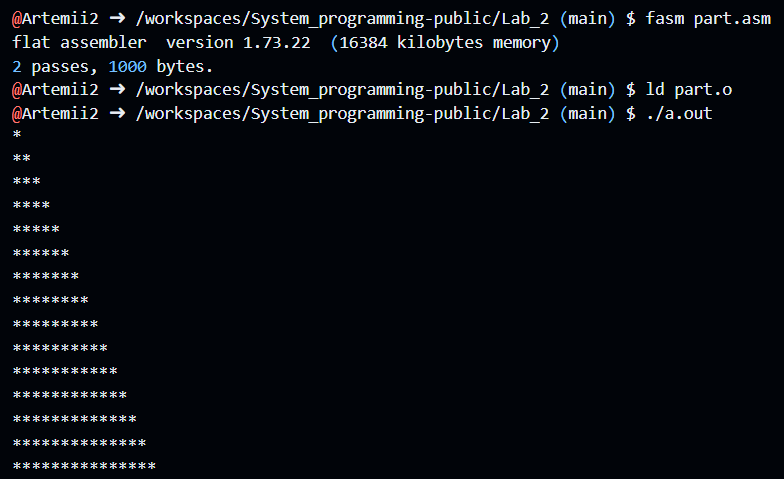

Задание 4

In [ ]:


format ELF64

public _start
public exit
public print_symb

section '.bss' writable
  number dq 3618218374    
  result dq 0            
  ten dq 10                  
  place db 1         

section '.text' executable
  _start:
    mov rax, [number]      
    xor rbx, rbx            
    .sum_loop:
      xor rdx, rdx           
      div qword [ten]         
      add rbx, rdx            
      test rax, rax              
      jnz .sum_loop        
    mov [result], rbx        
    call print_symb         
    mov eax, 60              
    xor edi, edi        
    syscall                  

print_symb:
    mov rax, [result]       
    mov rdi, 10             
    xor rbx, rbx             
    cmp rax, 0
    je .print_zero
    .loop:
        xor rdx, rdx           
        div rdi               
        push rdx                
        inc rbx                
        test rax, rax           
        jnz .loop                 
    .print_loop:
        pop rax                  
        add rax, '0'             
        mov [place], al         
        mov eax, 1              
        mov edi, 1              
        mov rsi, place         
        mov edx, 1              
        syscall
        dec rbx                 
        jnz .print_loop       
    ret
    .print_zero:
        mov byte [place], '0'
        mov eax, 1              
        mov edi, 1              
        mov rsi, place         
        mov edx, 1              
        syscall
        ret

exit:
  mov eax, 60
  xor edi, edi
  syscall


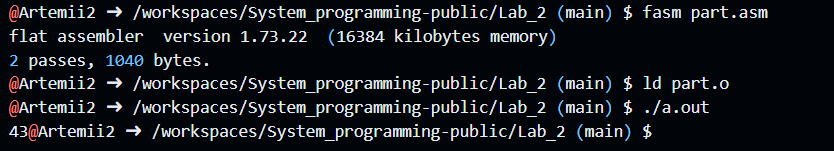

Задание 5

In [ ]:
# include <stdio.h>

int main() {
    long long number = 3618218374;
    int sum = 0;

    while (number > 0) {
        sum += number % 10;
        number /= 10;      
    }

    printf("%d\n", sum);
    return 0;
}


Сокращённый код на С

In [ ]:
# include <stdio.h>

int main() {
    long num = 3618218374;
    
    int sum = 0;

    for(;num>0;num/=10)sum += num % 10;

    printf("%d\n", sum);
    return 0;
}

Сокращённый код на Assembler

In [ ]:


format ELF64

public _start
public exit
public print_symb

section '.bss' writable
  number dq 3618218374    
  result dq 0            
  ten dq 10                  
  place db 1         

section '.text' executable
  _start:
    mov rax, [number]      
    xor rbx, rbx            
    .sum_loop:
      xor rdx, rdx           
      div qword [ten]         
      add rbx, rdx            
      test rax, rax              
      jnz .sum_loop        
    mov [result], rbx        
    call print_symb         
    mov eax, 60              
    xor edi, edi        
    syscall                  

print_symb:
    mov rax, [result]       
    mov rdi, 10             
    xor rbx, rbx             
    cmp rax, 0
    je .print_zero
    .loop:
        xor rdx, rdx           
        div rdi               
        push rdx                
        inc rbx                
        test rax, rax           
        jnz .loop                 
    .print_loop:
        pop rax                  
        add rax, '0'             
        mov [place], al         
        mov eax, 1              
        mov edi, 1              
        mov rsi, place         
        mov edx, 1              
        syscall
        dec rbx                 
        jnz .print_loop       
    ret
    .print_zero:
        mov byte [place], '0'
        mov eax, 1              
        mov edi, 1              
        mov rsi, place         
        mov edx, 1              
        syscall
        ret

exit:
  mov eax, 60
  xor edi, edi
  syscall
